In [1]:
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import livelossplot
from livelossplot import PlotLossesKerasTF

In [2]:
data=pd.read_csv("gold fund.csv")

In [3]:
data.head()

,ID,Gender,AMB,AccountSince,RelationshipSize,AvgMonthlyTxn,DematAccounts,FD_Nos,MF_nos,Equity_mfs,Debt_mfs,Balanced_Funds,ELSS,PMS_accounts,Trading_Accounts,Speciality_funds,Gold_Fund
0,25,1,297,22,2,14,0,1,1,0,0,0,0,0,0,0,0
1,46,1,138,56,7,22,2,1,2,0,1,0,1,1,0,0,0
2,47,1,228,2,1,2,0,0,0,0,0,0,0,0,0,0,0
3,61,1,190,16,1,16,0,0,0,0,0,0,1,0,0,0,0
4,79,1,187,14,1,14,1,0,0,0,0,0,0,0,0,0,0


In [4]:
x=data.iloc[:,1:-1]
y=data.Gold_Fund

In [5]:
# split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

# standardise data
from sklearn.preprocessing import StandardScaler
stdSc=StandardScaler()
stdSc.fit(x_train)
x_train_std=stdSc.transform(x_train)
x_test_std=stdSc.transform(x_test)

In [6]:
y_train.value_counts()/y_train.size

0    0.914504
1    0.085496
Name: Gold_Fund, dtype: float64

In [7]:
from tensorflow.keras.metrics import Precision, Recall

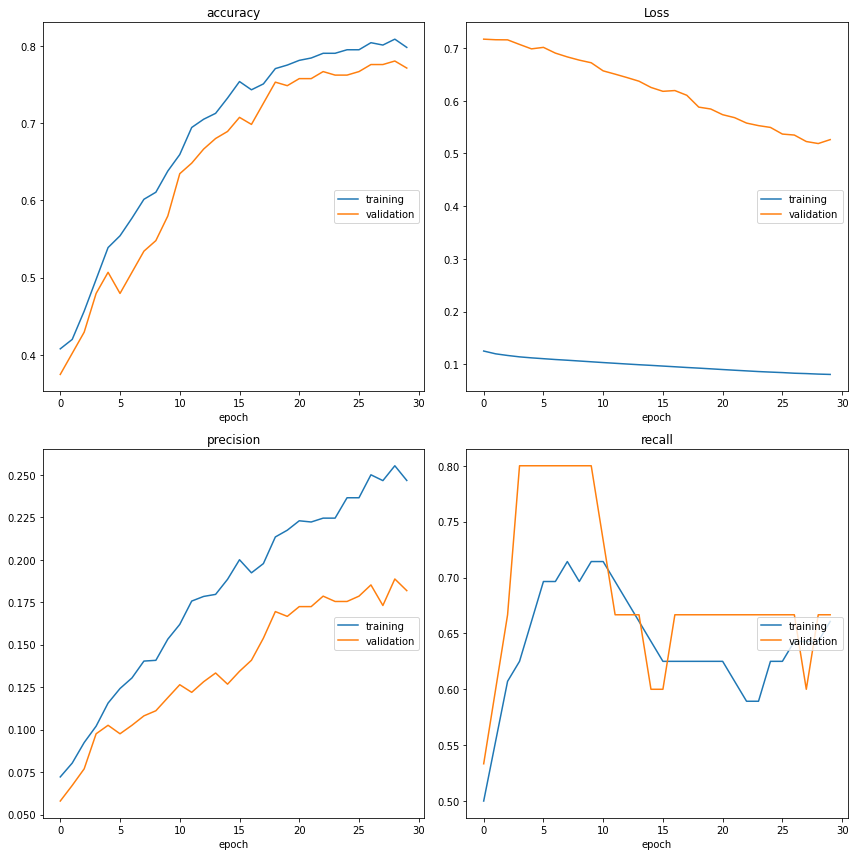

accuracy
	training         	 (min:    0.408, max:    0.809, cur:    0.798)
	validation       	 (min:    0.374, max:    0.781, cur:    0.772)
Loss
	training         	 (min:    0.081, max:    0.125, cur:    0.081)
	validation       	 (min:    0.519, max:    0.717, cur:    0.526)
precision
	training         	 (min:    0.072, max:    0.255, cur:    0.247)
	validation       	 (min:    0.058, max:    0.189, cur:    0.182)
recall
	training         	 (min:    0.500, max:    0.714, cur:    0.661)
	validation       	 (min:    0.533, max:    0.800, cur:    0.667)
21/21 [==============================] - 1s 65ms/step - loss: 0.0806 - accuracy: 0.7985 - precision: 0.2467 - recall: 0.6607 - val_loss: 0.5263 - val_accuracy: 0.7717 - val_precision: 0.1818 - val_recall: 0.6667
Epoch 31/50
16/21 [=====================>........] - ETA: 0s - loss: 0.0821 - accuracy: 0.8027 - precision: 0.2672 - recall: 0.6596

In [ ]:
goldModel=Sequential()
goldModel.add(Dense(10,activation="relu"))#h1
goldModel.add(Dense(10,activation="relu"))#h2
goldModel.add(Dense(1,activation="sigmoid"))#output
goldModel.compile(loss="binary_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy",Precision(),Recall()])

goldModel.fit(x_train_std,y_train,epochs=50,callbacks=[PlotLossesKerasTF()],validation_data=(x_test_std,y_test),class_weight={0:0.1,1:0.9})